<a href="https://colab.research.google.com/github/Gauravkumarlokhande/Gauravkumarlokhande/blob/main/Principle_component_analysis_(user_input_sample).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principle component analysis on ST Mahamandal data**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data=pd.read_excel('/content/drive/MyDrive/st data.xlsx')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Year                             72 non-null     datetime64[ns]
 1   Rate Of Breakdown(per 10,000km)  72 non-null     float64       
 2   % Load Factor                    72 non-null     float64       
 3   Traffic Reciept(in lakhs)        72 non-null     float64       
 4   Rate Of Accident(per lakh kms)   72 non-null     float64       
 5   Effective Kms(in lakhs)          72 non-null     float64       
 6   Average No. Of Shedules          72 non-null     float64       
 7   KPTL(Diesel)                     72 non-null     float64       
 8   KPL(engine oil)                  72 non-null     float64       
 9   Margin(in lakhs)                 72 non-null     float64       
 10  EPKM(per 10,000km)               72 non-null     float64       


In [41]:
data_dropped=data.drop(columns=['Year'])

In [42]:
def change(value):
  if value<0:
    return 'loss'
  elif value>0:
    return 'profit'
  else:
    return 'None'

In [43]:
data_dropped['Margin(in lakhs)']=data_dropped['Margin(in lakhs)'].apply(change)

In [44]:
data_dropped['Margin(in lakhs)'].unique()

array(['loss'], dtype=object)

In [124]:
def pca(data):
  import plotly.express as px
  from sklearn.decomposition import PCA

  # target variable input
  target=str(input('Enter your target variable:'))  
  data_new=data.drop(columns=[target])

  #user input for normalization and scaling

  #Normalizing the data
  from sklearn.preprocessing import normalize
  data_normal=normalize(data_new)

  
  data_frame=pd.DataFrame(data_normal,columns=data_new.columns)
  # number of components
  compo=int(input('Enter the number of components you need: '))

  # PCA Plot
  pca = PCA(n_components=compo)
  components = pca.fit_transform(data_frame)
  labels = {
      str(i): f"PC {i+1} ({var:.1f}%)"
      for i, var in enumerate(pca.explained_variance_ratio_ * 100)
      }
  fig = px.scatter_matrix(
      components,
      labels=labels,
      dimensions=range(compo),
      color=data[target]
      )
  fig.update_traces(diagonal_visible=False)
  fig.show()

  print('------------------------------------------------------------------------------------------------------------------')
  

  #Dendogram plot
  import scipy.cluster.hierarchy as shc
  plt.figure(figsize=(10, 7))  
  plt.title("Dendrograms")  
  dend = shc.dendrogram(shc.linkage(data_frame.T, method='ward'),labels=data_frame.columns)
  plt.xticks(rotation=45)
  plt.figure(figsize=(10, 7))  
  plt.title("Dendrograms")  
  dend = shc.dendrogram(shc.linkage(data_frame.T, method='ward'),labels=data_frame.columns)
  plt.xticks(rotation=45)
  thresh=float(input('What is your threshold value: '))
  plt.axhline(y=thresh, color='r', linestyle='--')

  print('------------------------------------------------------------------------------------------------------------------')


  from sklearn.cluster import AgglomerativeClustering
  cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
  cluster.fit_predict(data_frame)

  # Importing the library
  import seaborn as sns
  # Clustering data row-wise and
  sns.clustermap(data_frame, figsize=(10,10))
  print('------------------------------------------------------------------------------------------------------------------')

  #converting data again to original data
  import warnings
  warnings.filterwarnings('ignore')
  print('------------------------------------------------------------------------------------------------------------------')
  plt.figure(figsize=(10,10))
  sns.heatmap(data_frame.corr(),annot=True)

 




Enter your target variable:Margin(in lakhs)
Enter the number of components you need: 2


------------------------------------------------------------------------------------------------------------------
What is your threshold value: 4
------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------


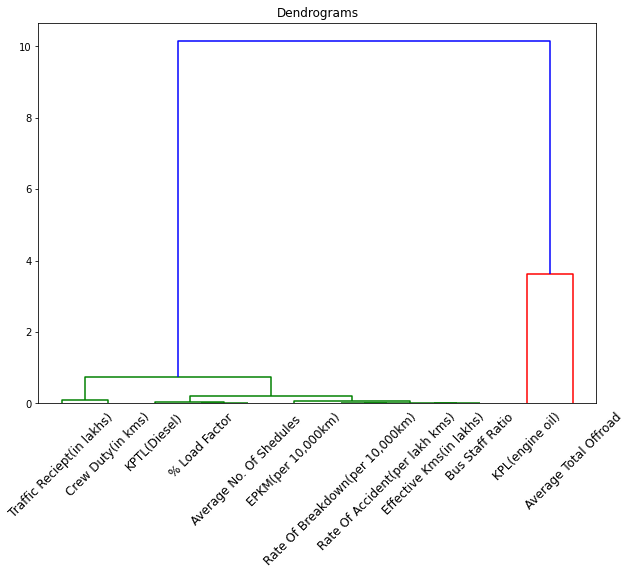

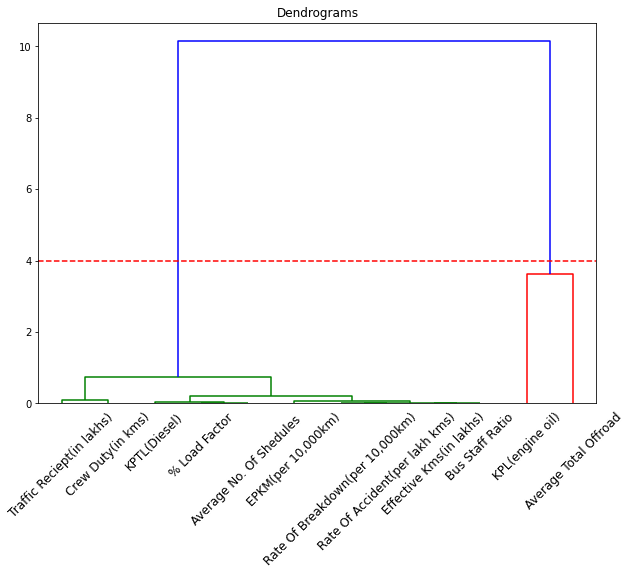

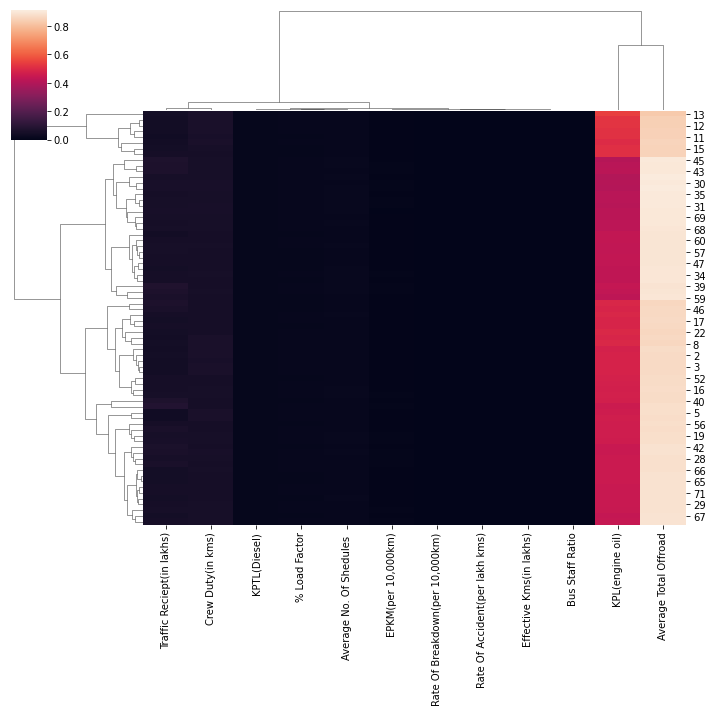

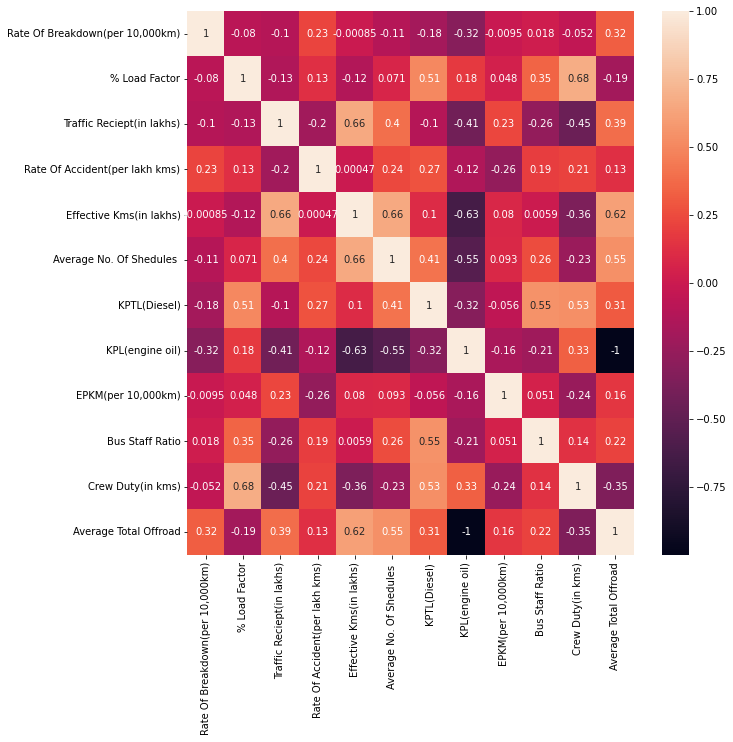

In [126]:

pca(data_dropped)